In [2]:
import os
import numpy as np
os.chdir('D:\\idea projects\\pycharm projects\\ature\\')
from commons.IMAGE import Image
from commons.ImgLATTICE import Lattice
import preprocess.utils.image_filters as fil
import preprocess.utils.image_utils as imgutil
import preprocess.utils.lattice_utils as lat
from commons.MAT import Mat
from PIL import Image as IMG

In [3]:
os.chdir('D:\\idea projects\\pycharm projects\\ature\\data\\av_wide_data_set')
file = Mat(file_name='wide_image_03.mat')
original = file.get_image('I2')[300:700,100:700,1]
original = file.get_image('I2')[:,:,1]

In [4]:
# os.chdir('D:\\idea projects\\pycharm projects\\ature\\data\\training\\images\\')
# original = IMG.open('21_training.tif')
# original = np.array(original.getdata(), np.uint8).reshape(original.size[1], original.size[0], 3)[:,:,1]
# os.chdir('D:\\idea projects\\pycharm projects\\ature\\data\\training\\mask\\')
# mask = IMG.open('21_training_mask.gif')
# mask = np.array(mask.getdata(), np.uint8).reshape(mask.size[1], mask.size[0])

In [5]:
img = Image(image_arr=original)

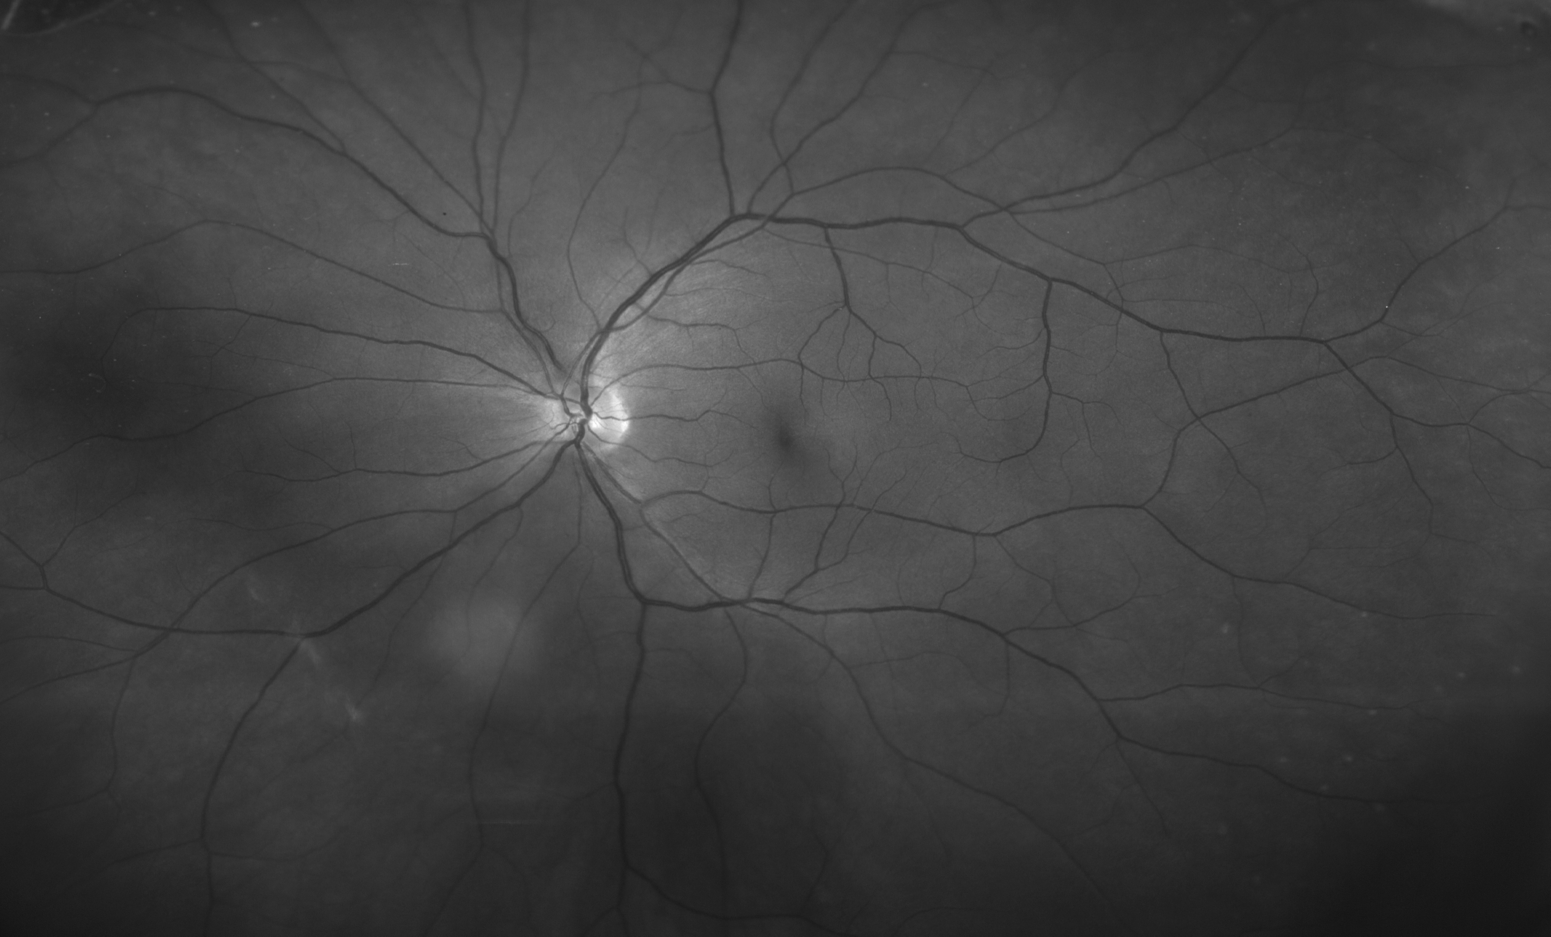

In [6]:
IMG.fromarray(img.img_array)

In [7]:
img.apply_bilateral()

INFO:root:Applying Bilateral filter.


In [9]:
dif_bilateral = imgutil.get_signed_diff_int8(img.img_array ,img.img_bilateral)

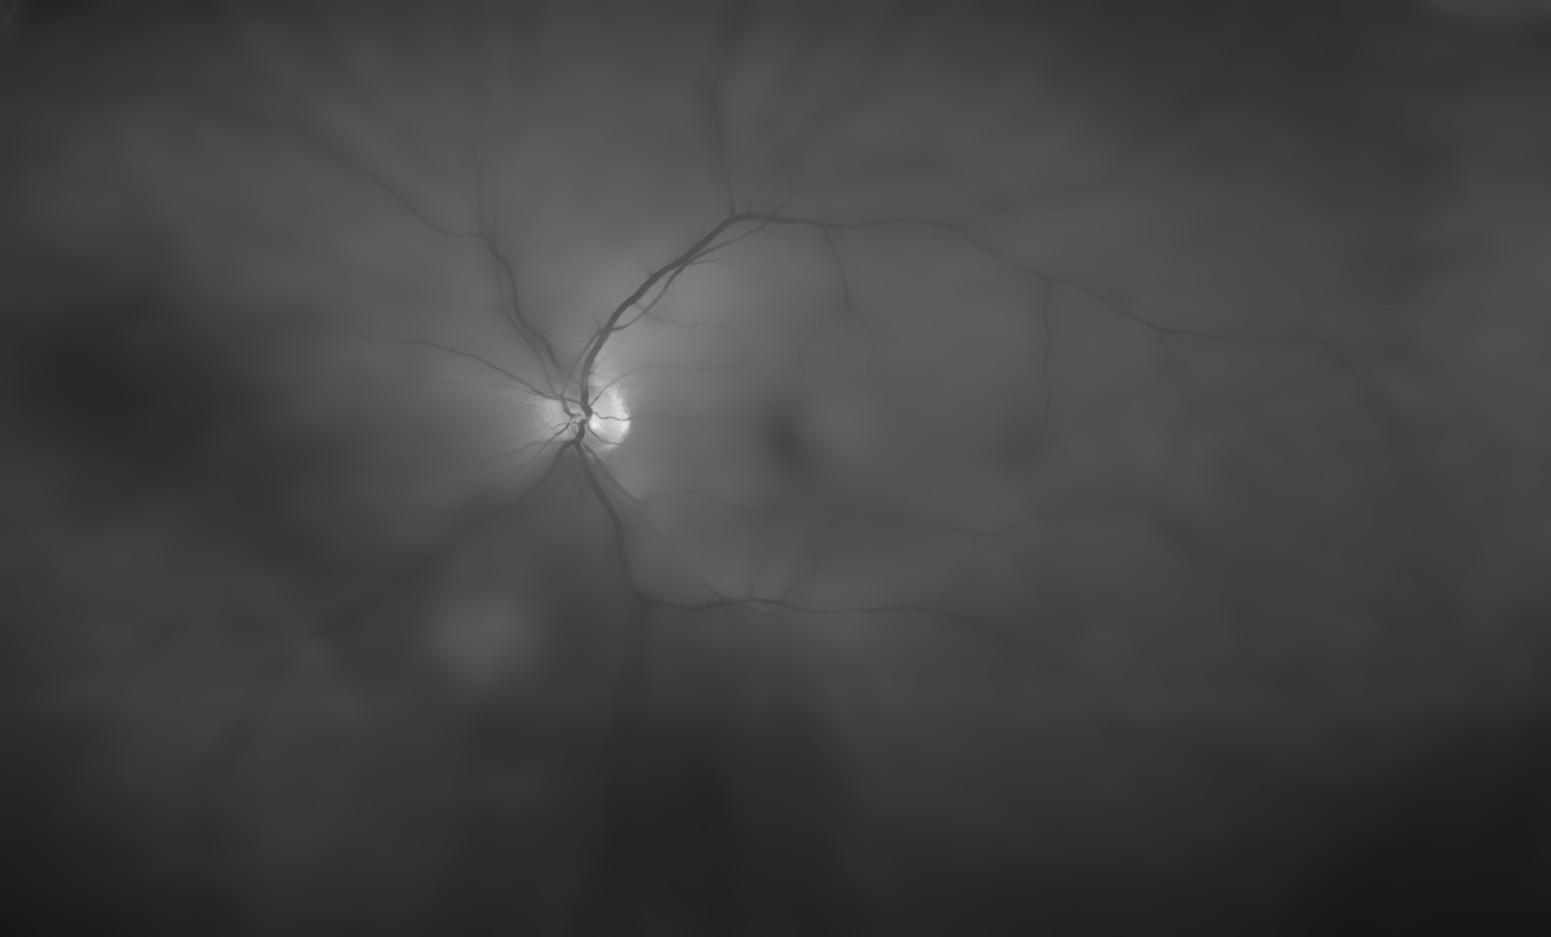

In [10]:
IMG.fromarray(img.img_bilateral)

In [11]:
def get_chosen_gabor_bank():
    kernels1 = fil.build_filter_bank(k_size=31, gamma=0.8, lambd=5, sigma=2)
    kernels2 = fil.build_filter_bank(k_size=31, gamma=0.8, lambd=8, sigma=3)
    kernels3 = fil.build_filter_bank(k_size=31, gamma=0.8, lambd=11, sigma=4)
    return kernels1 + kernels2 + kernels3

In [12]:
img.apply_gabor(255-dif_bilateral,kernel_bank= get_chosen_gabor_bank())

INFO:root:Applying Gabor filter.


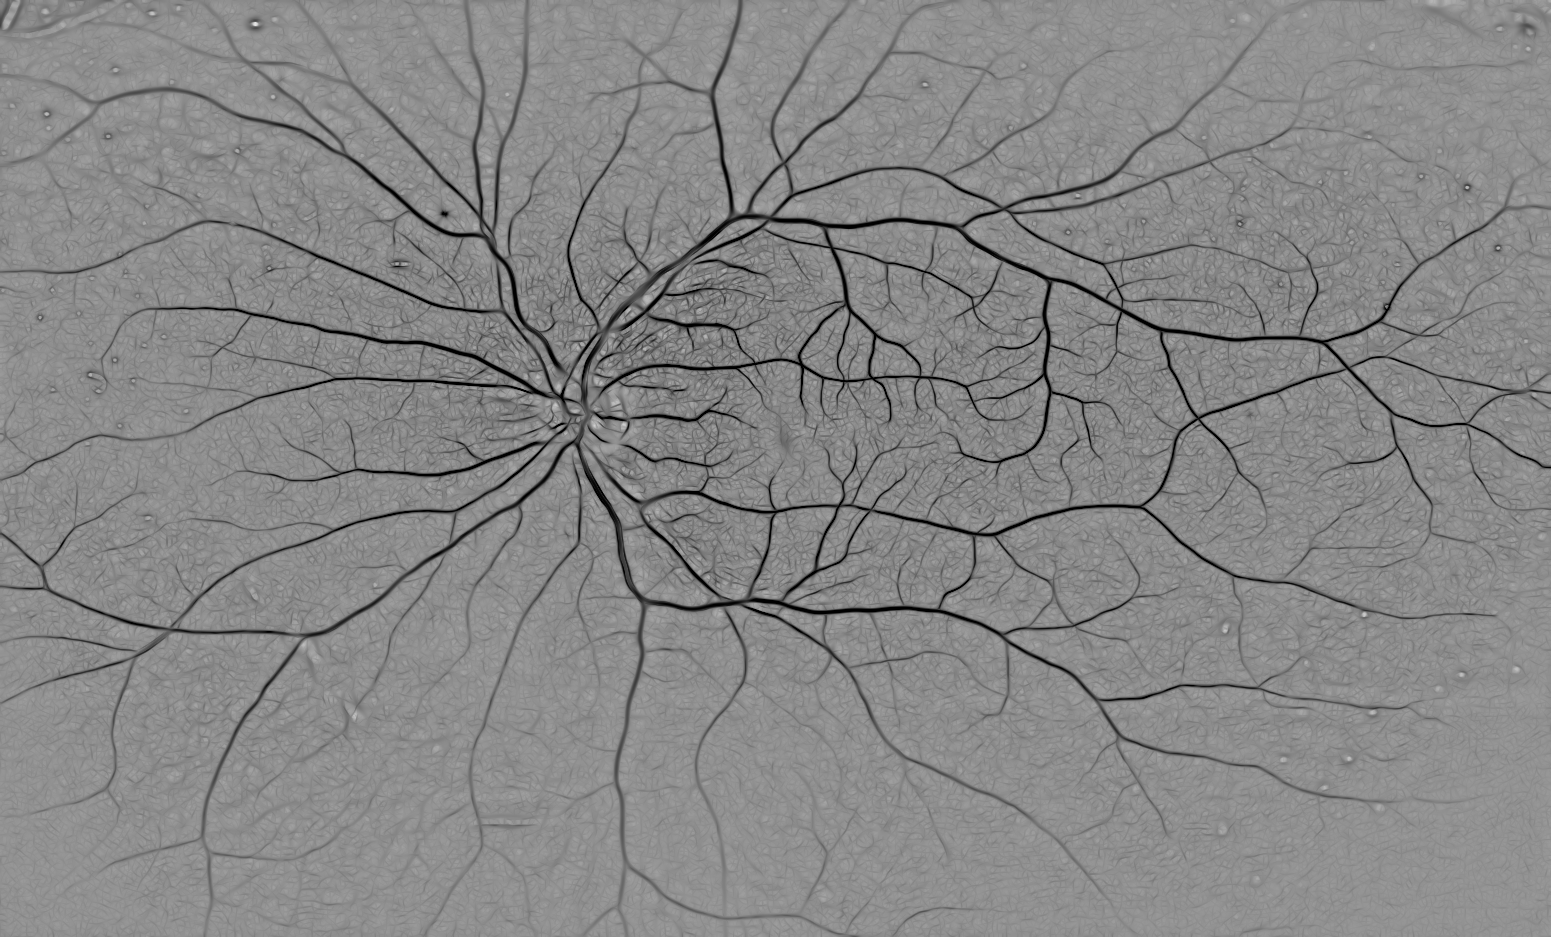

In [13]:
IMG.fromarray(255-img.img_gabor)

In [15]:
img.create_skeleton(kernels=fil.get_chosen_skeleton_filter())

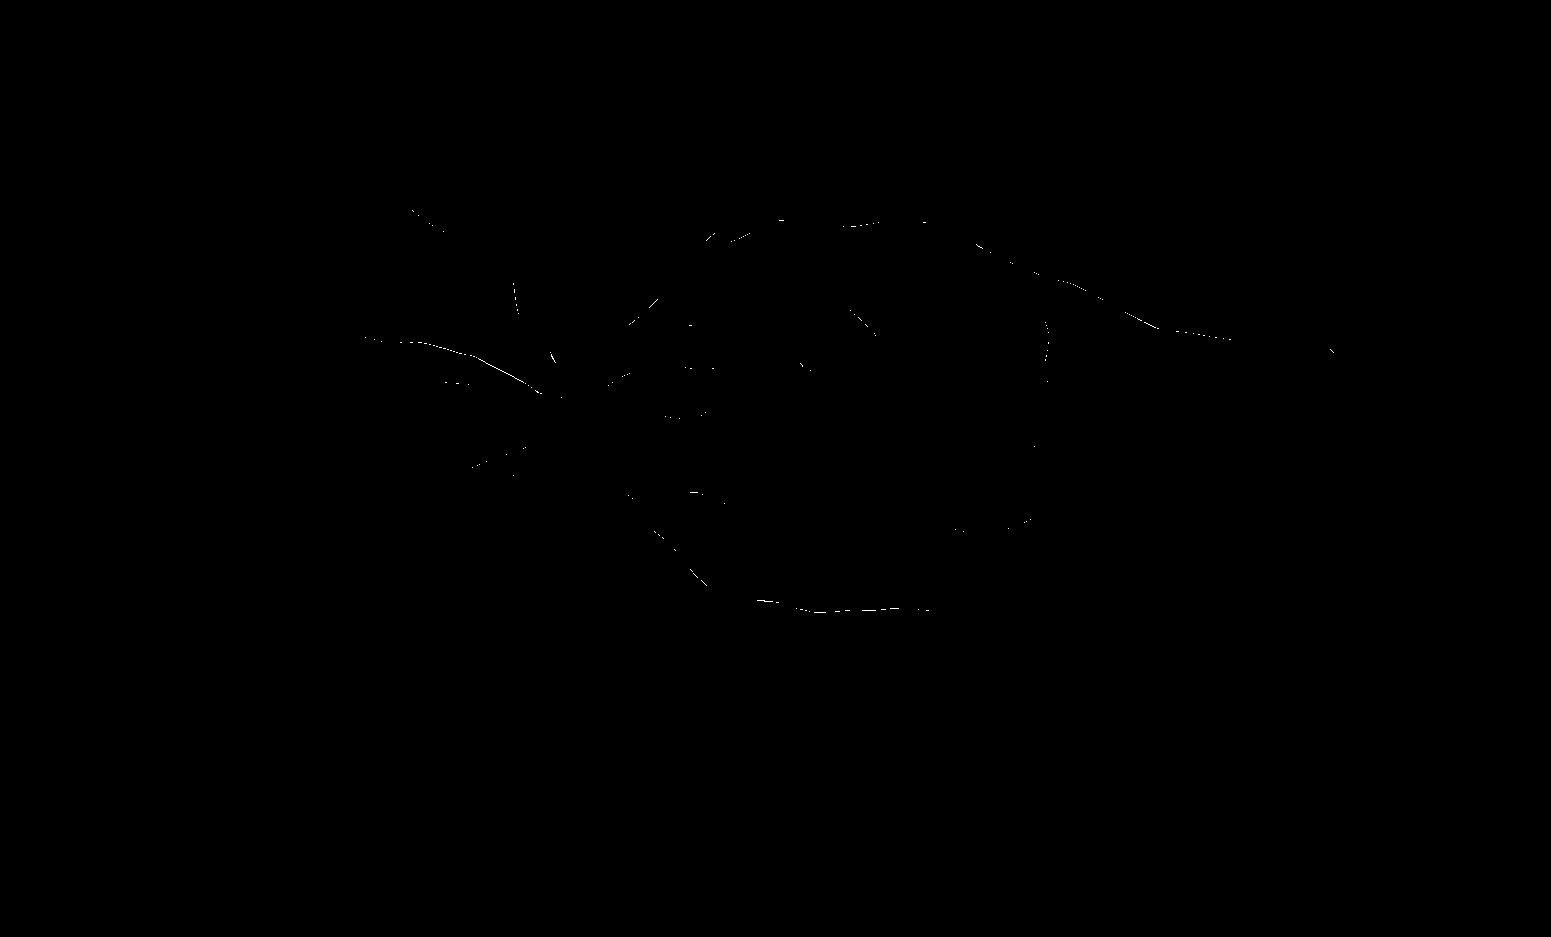

In [17]:
IMG.fromarray(255-img.img_skeleton)

In [18]:
# img.show_kernels(fil.get_chosen_gabor_bank())

In [19]:
lattice = Lattice(image_arr_2d=img.img_gabor)

In [20]:
lattice.generate_lattice_graph(eight_connected=False)

INFO:root:Creating 4-connected lattice.


------[ RUNNING Time: 11.04689335823059 seconds ]------


In [21]:
images =  [(0.7, 255-img.img_gabor),(0.3, img.img_array)]

In [22]:
lattice.assign_cost(images=images,alpha=5,log=False,override=True)

------[ RUNNING Time: 62.851526737213135 seconds ]------


In [23]:
import preprocess.algorithms.ature_mst as mst

In [26]:
seed_node_list = lat.get_seed_node_list(img.img_skeleton)
mst.run_mst(lattice_object=lattice,seed=seed_node_list,threshold=4)

KeyboardInterrupt: 

In [28]:
seed_node_list = lat.get_seed_node_list(img.img_skeleton)
mst.run_dijkstra(lattice_object=lattice,seed=seed_node_list,number_of_seeds=5, weight_limit_per_seed=100000)

KeyboardInterrupt: 

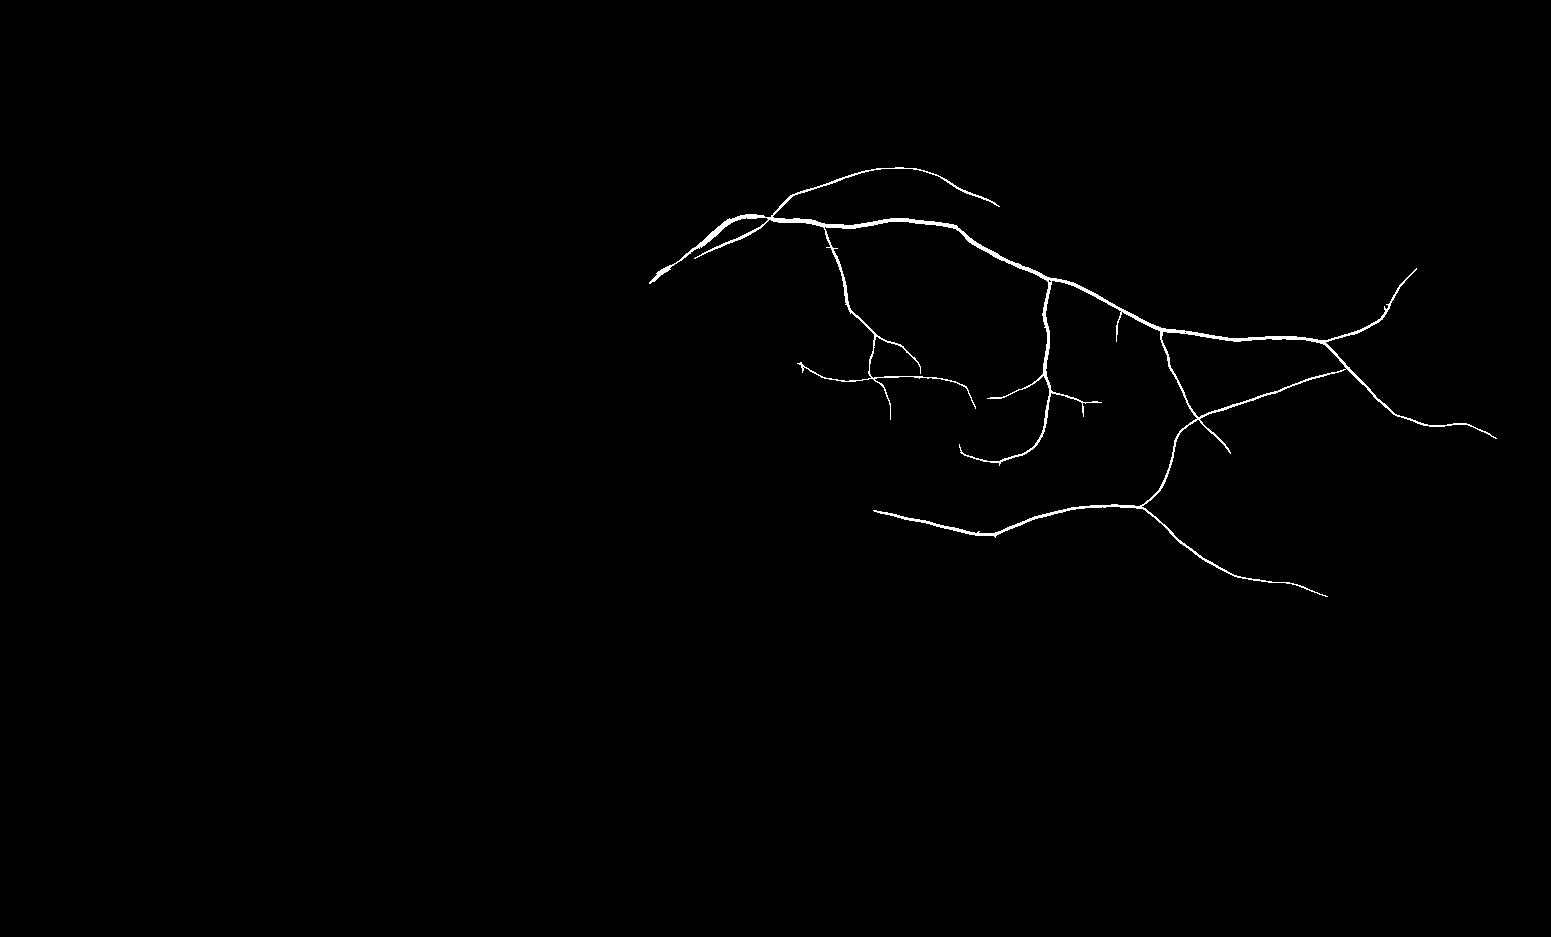

In [27]:
IMG.fromarray(lattice.accumulator)